In [2]:
# Importing libraries
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
warnings.filterwarnings("ignore")
plt.style.use("default")
sns.set_palette("husl")

os.makedirs("figures", exist_ok=True)

In [4]:
def load_data():
    df = pd.read_csv("../../1_datasets/processed_data/BNPL_cleaned.csv")
    return df

In [5]:
def overview_and_visualizations(df):
    # Create 'PeriodTS' for time series from 'Year' and 'Quarter' if both exist
    if "Year" in df.columns and "Quarter" in df.columns:
        df["PeriodTS"] = pd.PeriodIndex(
            df["Year"].astype(str) + "Q" + df["Quarter"].astype(str), freq="Q"
        ).to_timestamp()
    # Overview: histograms for all numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 4 * len(numeric_cols)))
    if len(numeric_cols) == 1:
        axes = [axes]
    for i, col in enumerate(numeric_cols):
        axes[i].hist(df[col].dropna(), bins=30, color="#2E86AB", alpha=0.7)
        axes[i].set_title(f"Distribution of {col}", fontsize=14, fontweight="bold")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(
        "figures/BNPL_cleaned_numeric_distributions.png", dpi=300, bbox_inches="tight"
    )
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="RdYlBu_r", fmt=".2f", square=True)
    plt.title("Correlation Matrix of Numeric Features")
    plt.tight_layout()
    plt.savefig("figures/bnpl_correlation_heatmap.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Boxplot of financial_stress_score by over_indebtedness_flag
    if (
        "financial_stress_score" in df.columns
        and "over_indebtedness_flag" in df.columns
    ):
        plt.figure(figsize=(8, 5))
        sns.boxplot(x="over_indebtedness_flag", y="financial_stress_score", data=df)
        plt.title("Financial Stress Score by Over-Indebtedness")
        plt.xlabel("Over-Indebtedness Flag")
        plt.ylabel("Financial Stress Score")
        plt.tight_layout()
        plt.savefig("figures/financial_stress_by_indebtedness.png")
        plt.show()

    # Barplot of bnpl_usage_frequency by over_indebtedness_flag
    if "bnpl_usage_frequency" in df.columns and "over_indebtedness_flag" in df.columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(
            x="over_indebtedness_flag", y="bnpl_usage_frequency", data=df, ci=None
        )
        plt.title("BNPL Usage Frequency by Over-Indebtedness")
        plt.xlabel("Over-Indebtedness Flag")
        plt.ylabel("BNPL Usage Frequency")
        plt.tight_layout()
        plt.savefig("figures/bnpl_usage_by_indebtedness.png")
        plt.show()

    return numeric_cols

In [6]:
def group_analysis(df):
    # Example: group by Year and Quarter if available
    if "Year" in df.columns and "Quarter" in df.columns:
        df["PeriodTS"] = pd.PeriodIndex(
            df["Year"].astype(str) + "Q" + df["Quarter"].astype(str), freq="Q"
        ).to_timestamp()
        group_cols = ["Year", "Quarter", "PeriodTS"]
    elif "Year" in df.columns:
        group_cols = ["Year"]
    else:
        group_cols = []
    if group_cols:
        grouped = df.groupby(group_cols).mean(numeric_only=True)
        print("\nGrouped means by:", group_cols)
        print(grouped.head())

In [7]:
def summary_statistics(df, numeric_cols):
    print("\n" + "=" * 60)
    print("📊 SUMMARY STATISTICS")
    print("=" * 60)
    print("\n📈 Summary statistics for numeric columns:")
    print(df[numeric_cols].describe())
    # Percentage breakdown for binary/categorical columns
    for col in df.columns:
        if df[col].nunique() <= 10 and df[col].dtype in [int, float]:
            print(f"\nPercentage breakdown for {col}:")
            print(df[col].value_counts(normalize=True) * 100)

In [8]:
def save_processed_data(df):
    df.to_csv("figures/bnpl_explored.csv", index=False)
    print(
        "\n✅ Exploration complete! Processed data saved to 'figures/bnpl_explored.csv'"
    )
    print("📊 Visualizations saved as PNG files in the 'figures/' directory")

In [9]:
def main():
    df = load_data()
    numeric_cols = overview_and_visualizations(df)
    group_analysis(df)
    summary_statistics(df, numeric_cols)
    save_processed_data(df)

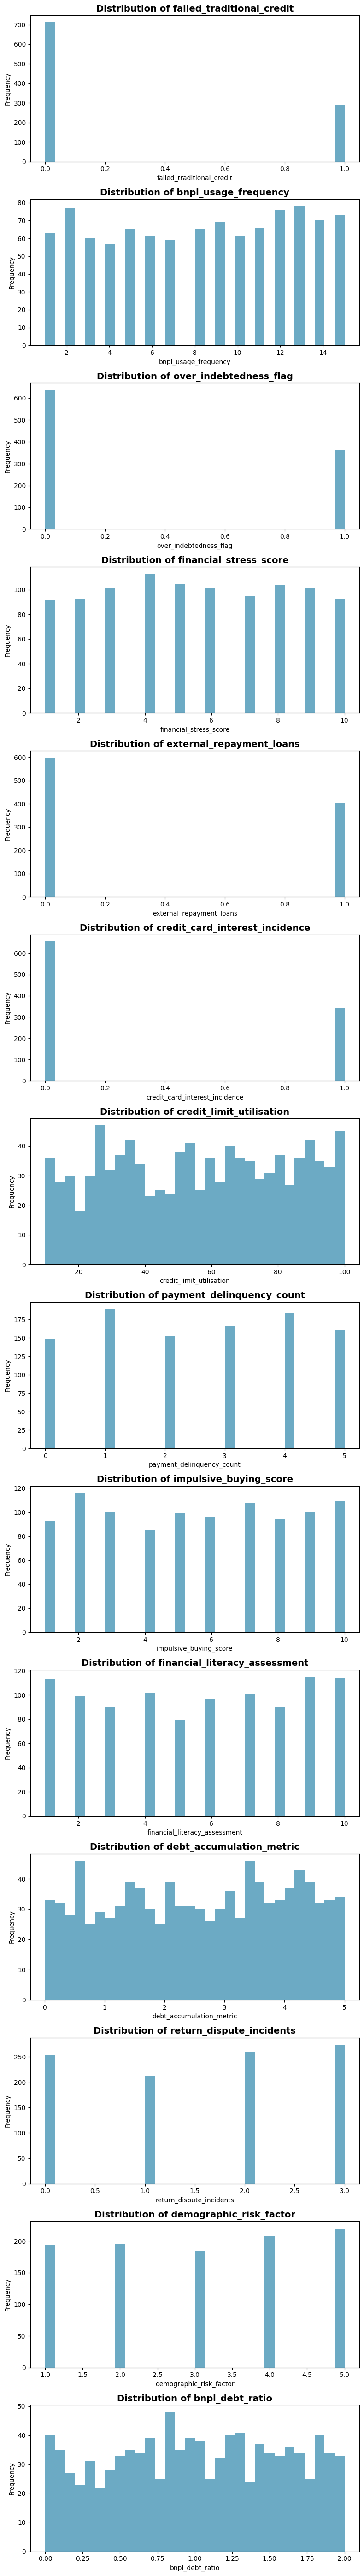

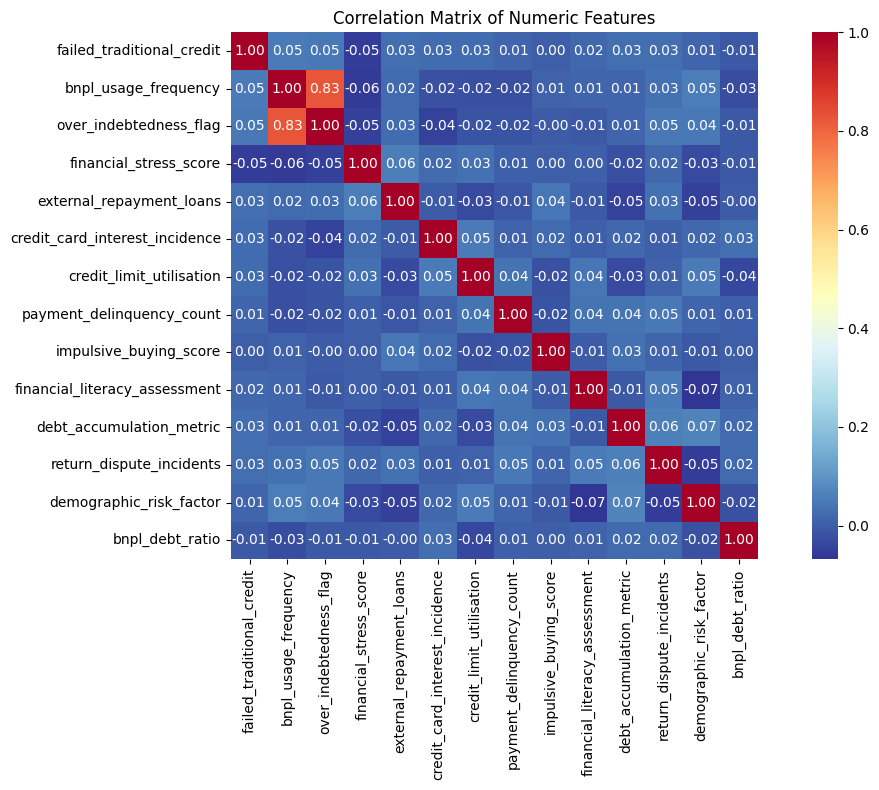

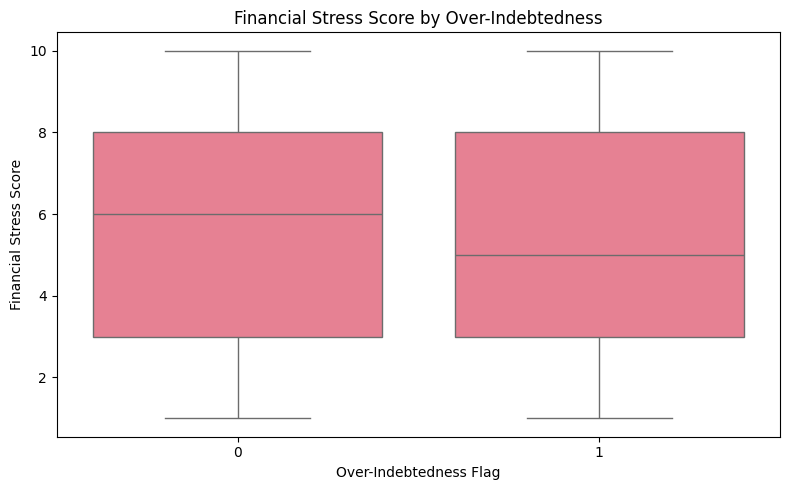

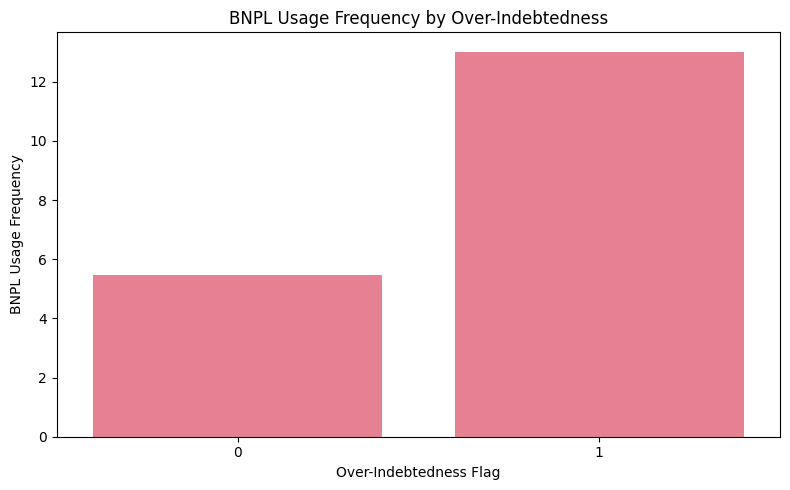


📊 SUMMARY STATISTICS

📈 Summary statistics for numeric columns:
       failed_traditional_credit  bnpl_usage_frequency  \
count                1000.000000           1000.000000   
mean                    0.288000              8.207000   
std                     0.453058              4.393797   
min                     0.000000              1.000000   
25%                     0.000000              4.000000   
50%                     0.000000              8.000000   
75%                     1.000000             12.000000   
max                     1.000000             15.000000   

       over_indebtedness_flag  financial_stress_score  \
count             1000.000000              1000.00000   
mean                 0.363000                 5.50900   
std                  0.481105                 2.81742   
min                  0.000000                 1.00000   
25%                  0.000000                 3.00000   
50%                  0.000000                 5.00000   
75%          

In [10]:
if __name__ == "__main__":
    main()